In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np 

In [2]:
df = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\Houses.csv' , encoding='utf-16', sep='|')

In [3]:
df['Valor']= df['Valor'].map(lambda x : str(x).replace('R$ ','').replace('.','')).astype(float)

<AxesSubplot:>

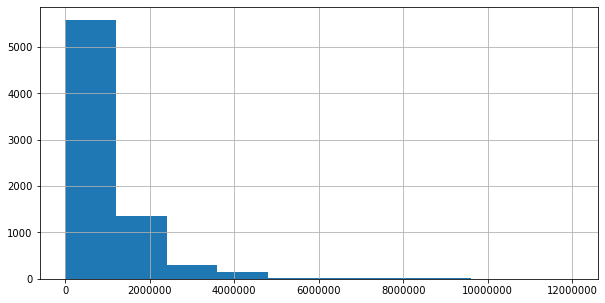

In [4]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(style = 'plain')
df['Valor'].hist()

In [5]:
df['Área útil'] =  df['Área útil'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Área construída'] = df['Área construída'].map(lambda x : str(x).replace('m²' ,'')).astype(float)

In [6]:
df['Area'] = df['Área útil'].fillna(df['Área construída'])

In [7]:
df = df[df['Area'] <120000]

In [8]:
df.groupby(['Categoria']).mean()

,Codigo,Page,Valor,Área útil,CEP,Área construída,Area
Categoria,,,,,,,
Apartamentos,"952,597,700.66",76.34,"942,449.90",203.65,"29,065,695.37",NaN,203.65
Casas,"951,553,515.93",73.80,"1,145,779.01",NaN,"29,052,764.90",328.29,328.29


In [11]:
df.dtypes

Codigo                      int64
Descricao                  object
Link                       object
Page                        int64
Valor                     float64
Categoria                  object
Tipo                       object
Área útil                 float64
Quartos                    object
Banheiros                  object
Vagas na garagem           object
CEP                         int64
Município                  object
Bairro                     object
Logradouro                 object
Área construída           float64
Detalhes do condominio     object
Condomínio                 object
IPTU                       object
Detalhes do imóvel         object
Area                      float64
dtype: object

In [12]:
df 

,Codigo,Descricao,Link,Page,Valor,Categoria,Tipo,Área útil,Quartos,Banheiros,...,CEP,Município,Bairro,Logradouro,Área construída,Detalhes do condominio,Condomínio,IPTU,Detalhes do imóvel,Area
0,977799191,"Honfleur Maison, um empreendimento paradisíaco...",https://es.olx.com.br/norte-do-espirito-santo/...,1,"1,700,000.00",Apartamentos,Venda - apartamento padrão,100.00,2,2,...,29050465,Vitória,Enseada do Suá,Avenida Capitão João Brandão,NaN,NaN,NaN,NaN,NaN,100.00
1,977798684,Highline Square - Torre Soho - Andar alto com ...,https://es.olx.com.br/norte-do-espirito-santo/...,1,"1,800,000.00",Apartamentos,Venda - apartamento padrão,97.00,3,2,...,29050225,Vitória,Enseada do Suá,Rua Humberto Martins de Paula,NaN,NaN,NaN,NaN,NaN,97.00
2,977797010,Sala comercial a venda em Vitória- Tiffany Cen...,https://es.olx.com.br/norte-do-espirito-santo/...,1,"185,000.00",Apartamentos,Venda - loft/studio,55.00,1,1,...,29056922,Vitória,Santa Lúcia,Avenida Nossa Senhora da Penha - de 295 a 699 ...,NaN,NaN,NaN,NaN,NaN,55.00
3,977793940,O MEU SONHO É VER VOCE NESSA CASA!VENDO CASA,https://es.olx.com.br/norte-do-espirito-santo/...,1,"300,000.00",Casas,Venda - casa em rua pública,NaN,2,1,...,29075030,Vitória,Goiabeiras,Avenida Adalberto Simão Nader - de 1731 a 1877...,120.00,NaN,NaN,NaN,NaN,120.00
4,977792475,"Excelente Localização na Praia do Canto, Edifí...",https://es.olx.com.br/norte-do-espirito-santo/...,1,"590,000.00",Apartamentos,Venda - apartamento padrão,68.00,2,2,...,29055370,Vitória,Praia do Canto,Rua Antônio Damiani,NaN,Condomínio fechado,NaN,NaN,NaN,68.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,964447555,Apartamento para venda com 174 metros quadrado...,https://es.olx.com.br/norte-do-espirito-santo/...,150,"1,550,000.00",Apartamentos,Venda - apartamento padrão,174.00,4,2,...,29055350,Vitória,Praia do Canto,Rua Moacir Avidos,NaN,"Elevador, Salão de festas, Portaria, Piscina, ...",NaN,NaN,"Salão de festas, Varanda, Área de serviço, Pis...",174.00
7496,906239694,COBERTURA LINEAR NO BARRO VERMELHO,https://es.olx.com.br/norte-do-espirito-santo/...,150,"1,500,000.00",Apartamentos,Venda - apartamento padrão,240.00,3,3,...,29057600,Vitória,Barro Vermelho,Rua Pedro Daniel,NaN,Elevador,NaN,NaN,NaN,240.00
7497,977761247,"Lindo e amplo apartamento em Jardim da Penha, ...",https://es.olx.com.br/norte-do-espirito-santo/...,150,"790,000.00",Apartamentos,Venda - apartamento padrão,99.00,3,3,...,29060903,Vitória,Jardim da Penha,Rua Natalina Daher Carneiro,NaN,Condomínio fechado,NaN,NaN,NaN,99.00
7498,967018090,O novo Resort Em Vitória !,https://es.olx.com.br/norte-do-espirito-santo/...,150,"1,535,039.00",Apartamentos,Venda - apartamento padrão,100.00,3,3,...,29050465,Vitória,Enseada do Suá,Avenida Capitão João Brandão,NaN,"Condomínio fechado, Elevador, Segurança 24h, P...",NaN,NaN,"Área de serviço, Varanda",100.00
